# Data Cleaning and Preprocessing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import httpimport

from pathlib import Path

In [7]:
# Import personal library
with httpimport.github_repo("junclemente", "jcds", ref="master"):
    import jcds.eda as jq

In [8]:
datasets = Path("../datasets/")
df_file = "maven_business_school/MavenBusinessSchool(final).xlsx"
df = pd.read_excel(datasets / df_file)
df.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000.0
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,NaN
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,NaN
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,NaN


## Data Quality Reports

In [9]:
jq.quick_report(df)

Quick Report - info(memory_usage='deep')
Total cols: 9
Rows missing all values: 0 (0.0%)
Total Rows: 1200
Cols with missing values: 4 (44.44%)
Total missing values in dataset: 4
Categorical features: 3
- Undergrad Degree: 5 unique values
- Work Experience: 2 unique values
- Status: 2 unique values
Continuous features: 6
- Student ID: 1200 unique values
- Undergrad Grade: 762 unique values
- MBA Grade: 837 unique values
- Employability (Before): 1182 unique values
- Employability (After): 776 unique values
- Annual Salary: 89 unique values


### Categorical Features

In [10]:
jq.dqr_cat(df)

The categorical features are: 
['Undergrad Degree', 'Work Experience', 'Status']
Data Quality Report for Categorical Features
Total features: 3 / 1200 rows
Stats
-----


,Feature,Count,Missing,% Missing,Cardinality
0,Undergrad Degree,1200,0,0.0,5
1,Work Experience,1200,0,0.0,2
2,Status,1200,0,0.0,2




Mode 1
------


,Feature,Mode 1,Mode 1 Freq.,Mode 1 %
0,Undergrad Degree,Business,257,21.42
1,Work Experience,No,1066,88.83
2,Status,Placed,716,59.67




Mode 2
------


,Feature,Mode 2,Mode 2 Freq.,Mode 2 %
0,Undergrad Degree,Computer Science,240,20.00
1,Work Experience,Yes,134,11.17
2,Status,Not Placed,484,40.33




Descriptive Stats
-----------------


,count,unique,top,freq
Undergrad Degree,1200,5,Business,257
Work Experience,1200,2,No,1066
Status,1200,2,Placed,716


### Continuous Features

In [11]:
jq.dqr_cont(df)

The non-categorical features are: 
['Student ID', 'Undergrad Grade', 'MBA Grade', 'Employability (Before)', 'Employability (After)', 'Annual Salary']
Data Quality for Continous Features
Total Features: 6 / 1200 rows


,Feature,Count,Missing,% missing,Cardinality
0,Student ID,1200,0,0.00,1200
1,Undergrad Grade,1164,36,3.00,762
2,MBA Grade,1200,0,0.00,837
3,Employability (Before),1193,7,0.58,1182
4,Employability (After),1195,5,0.42,776
5,Annual Salary,716,484,40.33,89




Descriptive Stats


,count,mean,std,min,25%,50%,75%,max
Student ID,1200.0,600.50,346.55,1.0,300.75,600.50,900.25,1200.00
Undergrad Grade,1164.0,56.56,22.31,10.0,39.88,56.91,75.02,100.00
MBA Grade,1200.0,52.83,23.49,0.0,35.72,53.20,72.47,96.10
Employability (Before),1193.0,216.31,36.28,62.0,189.96,215.24,239.66,423.00
Employability (After),1195.0,288.08,124.53,62.0,197.86,260.93,349.00,697.39
Annual Salary,716.0,125285.71,49343.71,20000.0,100500.00,100500.00,148000.00,470333.33


In [12]:
# Verify that all 484 missing values in Annual Salary is due to Status == Not Placed
nan_annual_salary = df[
    (df.Status == "Not Placed") & (df["Annual Salary"].isna())
].shape[0]
print(
    f"Number of NaN values in Annual Salary where Status == 'Not Placed': {nan_annual_salary}."
)

Number of NaN values in Annual Salary where Status == 'Not Placed': 484.


## Clean missing values

In [13]:
cols = df.columns.tolist()
cols

['Student ID',
 'Undergrad Degree',
 'Undergrad Grade',
 'MBA Grade',
 'Work Experience',
 'Employability (Before)',
 'Employability (After)',
 'Status',
 'Annual Salary']

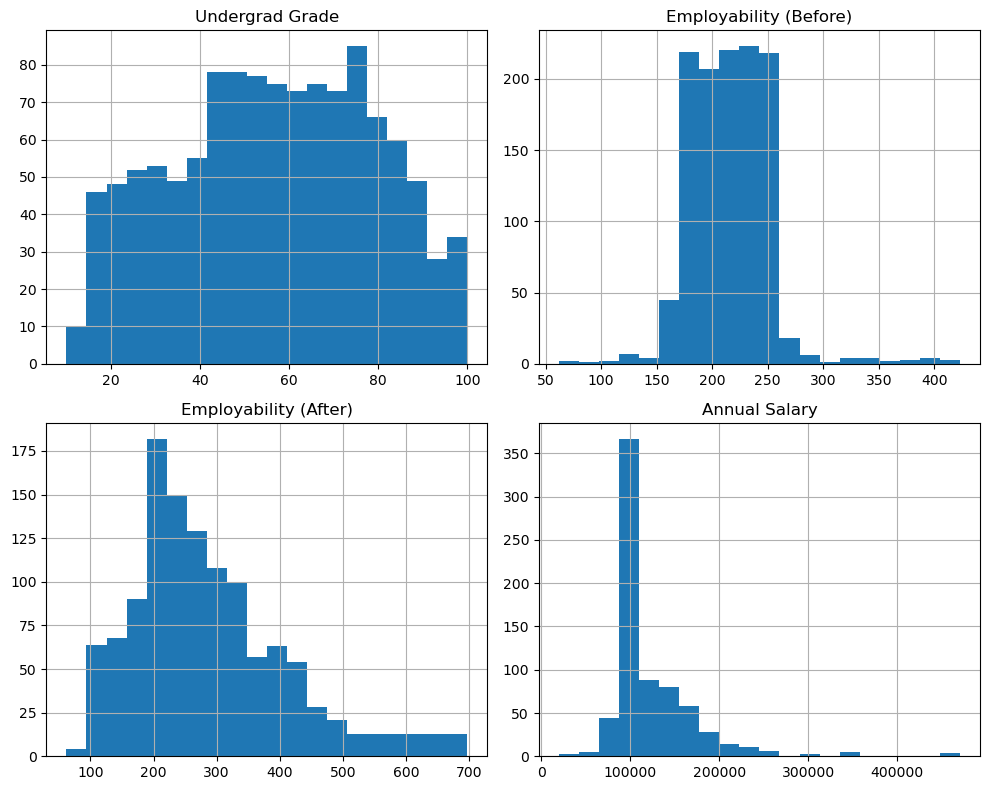

In [14]:
missing_cols = [
    "Undergrad Grade",
    "Employability (Before)",
    "Employability (After)",
    "Annual Salary",
]
df[missing_cols].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

Based on the skewness of the distribution shown in the charts, the median will be used to impute missing values.

Missing values in Annual Salary will be imputed with 0.  

### Impute Missing Values

In [15]:
df["Undergrad Grade"].fillna(df["Undergrad Grade"].median(), inplace=True)
df["Employability (Before)"].fillna(df["Employability (Before)"].median(), inplace=True)
df["Employability (After)"].fillna(df["Employability (After)"].median(), inplace=True)
# Replace missing values with 0 for Annual Salary.
df["Annual Salary"].fillna(0, inplace=True)

In [16]:
jq.dqr_cont(df)

The non-categorical features are: 
['Student ID', 'Undergrad Grade', 'MBA Grade', 'Employability (Before)', 'Employability (After)', 'Annual Salary']
Data Quality for Continous Features
Total Features: 6 / 1200 rows


,Feature,Count,Missing,% missing,Cardinality
0,Student ID,1200,0,0.0,1200
1,Undergrad Grade,1200,0,0.0,762
2,MBA Grade,1200,0,0.0,837
3,Employability (Before),1200,0,0.0,1181
4,Employability (After),1200,0,0.0,775
5,Annual Salary,1200,0,0.0,89




Descriptive Stats


,count,mean,std,min,25%,50%,75%,max
Student ID,1200.0,600.50,346.55,1.0,300.75,600.50,900.25,1200.00
Undergrad Grade,1200.0,56.57,21.97,10.0,40.50,56.91,74.53,100.00
MBA Grade,1200.0,52.83,23.49,0.0,35.72,53.20,72.47,96.10
Employability (Before),1200.0,216.30,36.17,62.0,190.11,215.24,239.52,423.00
Employability (After),1200.0,287.97,124.28,62.0,197.96,260.93,348.40,697.39
Annual Salary,1200.0,74753.81,72336.36,0.0,0.00,100500.00,109000.00,470333.33


# Export Clean Dataset

In [17]:
# Rename columns to remove spaces and brackets
df.columns = df.columns.str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
print(df.columns)

Index(['Student_ID', 'Undergrad_Degree', 'Undergrad_Grade', 'MBA_Grade',
       'Work_Experience', 'Employability_Before', 'Employability_After',
       'Status', 'Annual_Salary'],
      dtype='object')


In [18]:
df_clean = df.copy()
df_clean.to_csv(datasets / "school_clean.csv", index=False)

In [19]:
dfc = pd.read_csv(datasets / "school_clean.csv")
dfc.head()

,Student_ID,Undergrad_Degree,Undergrad_Grade,MBA_Grade,Work_Experience,Employability_Before,Employability_After,Status,Annual_Salary
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000.0
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,0.0
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,0.0
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,0.0
